In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
import cmocean.cm as ocm
from matplotlib import cm
import matplotlib
import matplotlib.gridspec as gridspec

proj_dir = os.path.join(os.pardir,os.pardir)
data_dir = os.path.join(proj_dir,'data')

src_dir = os.path.join(proj_dir,'src')
sys.path.append(src_dir)

tools_dir = os.path.join(src_dir,'tools')
sys.path.append(tools_dir)


In [4]:
from dask.distributed import Client
c = Client()
c

Client Scheduler: tcp://127.0.0.1:35678 Dashboard: http://127.0.0.1:40015/status,Cluster Workers: 16 Cores: 16 Memory: 101.38 GB


In [5]:
grd_path = os.path.join(data_dir,'analysis','interim','grd2_dV.nc')
grd = xr.open_dataset(grd_path)

avg_path = os.path.join(data_dir,'analysis','raw','waom2','ocean_avg_0538-0610_salt_ymonmean.nc')
avg = xr.open_dataset(avg_path)

In [ ]:
for i in range(12):
    iso = grd.z.where(avg.salt[i]<34).min('s_rho')
    plot_asw_depth(-iso,i)

In [2]:
grd_path = os.path.join(data_dir,'analysis','interim','grd10_dV.nc')
grd = xr.open_dataset(grd_path)

avg_path = os.path.join(data_dir,'analysis','raw','waom10','ocean_avg_0009.nc')
avg = xr.open_dataset(avg_path).isel(ocean_time=0)

In [12]:
grd.zice.min()

<xarray.DataArray 'zice' ()>
array(-2534.)

In [8]:
iso = grd.z.where(avg.salt<34).min('s_rho')

In [ ]:
def plot_asw_depth(iso,month):
   
    fig,ax = plt.subplots(figsize=(12,14))
    fig.set_facecolor('lightgray')
    ax.contourf(grd.mask_rho.where(grd.mask_rho==0),colors=(('0.6','0.6','0.6')))
    
    #ax.contourf(grd.mask_rho.where((grd.mask_rho==1) & (grd.zice<0)),colors='b') #colors=(('0.8','0.8','0.8')))
    #ax.contourf(grd.mask_rho.where((grd.mask_rho==1) & (grd.zice<0) & (grd.zice> -400)),colors='y')#'(('0.9','0.9','0.9')))
    #ax.contourf(grd.mask_rho.where((grd.mask_rho==1) & (grd.zice<0) & (grd.zice> -200)),colors='r')#,colors=(('0.9','0.9','0.9')))
    iso_plt = ax.pcolormesh(iso,vmin=0,vmax=2000,cmap=cm.Spectral_r)
    #m_plt = ax.pcolormesh(m.where((grd.mask_rho ==1) & (grd.zice<0.0))*s2a,vmin=m_min,vmax=m_max,cmap='bwr')
    
    ax.contour(grd.zice.where(grd.mask_rho==1), levels=['-0.1'], colors=('black'),linewidths=0.5)
    ax.contour(grd.zice.where(grd.mask_rho==1), levels=[-400,-200], colors=('gray'),linewidths=0.5)
    #ax.contour(grd.h.where(mask_shelf['Total Antarctica']), levels=['500','1000','1500'], colors=('black'),
    #           linewidths=0.2)
    #ax.contour(grd.mask_rho, colors=('black'),linewidths=0.1)
    
    cb1 = plt.colorbar(iso_plt, ax=ax, orientation="horizontal", pad=0.01, extend='both')
    cb1.set_label(label='34 psu depth', size='large', weight='bold')
    cb1.ax.tick_params(labelsize='large')  
    
    ax.set_title(f'waom month {month}') 
    
    #cb2 = plt.colorbar(m_plt, ax=ax, orientation="horizontal", pad=0.1, extend='both')
    #cb2.set_label(label='Melt rate in m/yr', size='xx-large', weight='bold')
    #cb2.ax.tick_params(labelsize='xx-large')    
    
    #ax.contour((grd.zice >= -400) & (grd.mask_rho ==1), levels=['0.05'], colors=('black'),linewidths=0.2)
    #ax.contour((grd.zice >= -200) & (grd.mask_rho ==1), levels=['0.05'], colors=('black'),linewidths=0.2,linestyles='dashed')
    
    #names = ['Ronne','Filchner']
    #test = { key:value for key,value in shelves.items() if key in names}

    #for key,data in log_progress(shelves.items(),name='shelves'):
    #       ax.contour(data['mask'], colors=('black'),linewidths=0.05)
            
    #cbaxes1 = fig.add_axes([0.12, 0.2, 0.45, 0.02])
    #cbaxes2 = fig.add_axes([0.62, 0.2, 0.45, 0.02])
       
    #plt.colorbar(m_plt,cax=cbaxes1,extend='both',label='Melt rate [m/yr]',orientation="horizontal")
    #plt.colorbar(temp_plt,cax=cbaxes2,extend='both',label='Potential temperature [degC]',orientation="horizontal")
    
    #for k,sec_mask in mask_sector.items():
    #    sec_mask.where((grd.mask_rho ==1)&(grd.zice==0.0)).plot.contour(colors=('black'),linewidths=0.1,ax=ax) 
    
    ax.set_aspect('equal')
    ax.axis('off')

    
    #if out_path:
    #    plt.savefig(out_path,format='png',dpi=400,bbox_inches = "tight")
    plt.show()

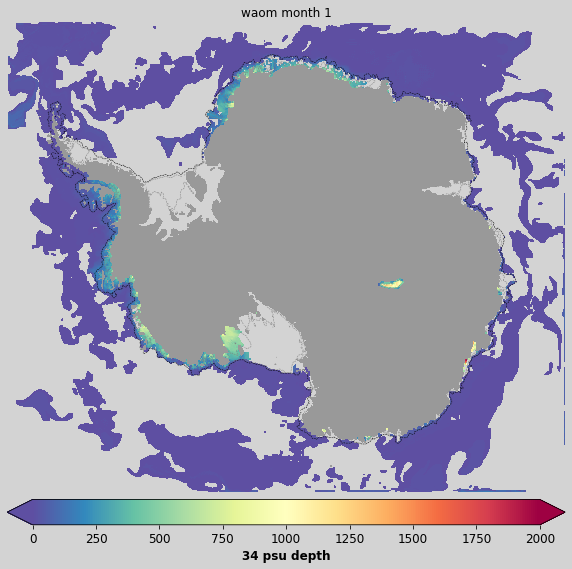

In [21]:
plot_asw_depth(-iso,1)

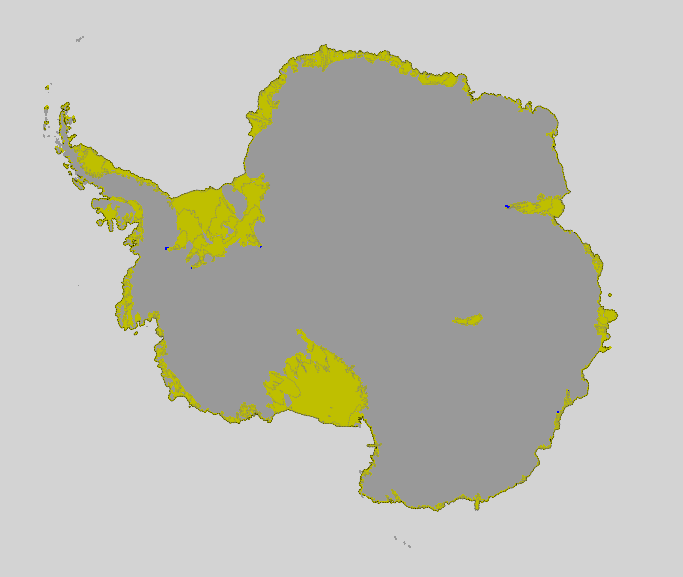

In [10]:
def plot_depth():
   
    fig,ax = plt.subplots(figsize=(12,14))
    fig.set_facecolor('lightgray')
    ax.contourf(grd.mask_rho.where(grd.mask_rho==0),colors=(('0.6','0.6','0.6')))
    
    ax.contourf(grd.mask_rho.where((grd.mask_rho==1) & (grd.zice<0)),colors='b') #colors=(('0.8','0.8','0.8')))
    plot = ax.contourf(grd.mask_rho.where((grd.mask_rho==1) & (grd.zice<0) & (grd.zice> -1600)),colors='y')#'(('0.9','0.9','0.9')))
    #ax.contourf(grd.mask_rho.where((grd.mask_rho==1) & (grd.zice<0) & (grd.zice> -200)),colors='r')#,colors=(('0.9','0.9','0.9')))
    #iso_plt = ax.pcolormesh(iso,vmin=0,vmax=2000,cmap=cm.Spectral_r)
    #m_plt = ax.pcolormesh(m.where((grd.mask_rho ==1) & (grd.zice<0.0))*s2a,vmin=m_min,vmax=m_max,cmap='bwr')
    
    ax.contour(grd.zice.where(grd.mask_rho==1), levels=['-0.1'], colors=('black'),linewidths=0.5)
    ax.contour(grd.zice.where(grd.mask_rho==1), levels=[-1400,-1200,-1000,-800,-600,-400,-200], colors=('gray'),linewidths=0.5)
    #ax.contour(grd.h.where(mask_shelf['Total Antarctica']), levels=['500','1000','1500'], colors=('black'),
    #           linewidths=0.2)
    #ax.contour(grd.mask_rho, colors=('black'),linewidths=0.1)
    
    #cb1 = plt.colorbar(plot, ax=ax, orientation="horizontal", pad=0.01, extend='both')
    #cb1.set_label(label='depth range', size='large', weight='bold')
    #cb1.ax.tick_params(labelsize='large')  
    
    #ax.set_title(f'waom month {month}') 
    
    #cb2 = plt.colorbar(m_plt, ax=ax, orientation="horizontal", pad=0.1, extend='both')
    #cb2.set_label(label='Melt rate in m/yr', size='xx-large', weight='bold')
    #cb2.ax.tick_params(labelsize='xx-large')    
    
    #ax.contour((grd.zice >= -400) & (grd.mask_rho ==1), levels=['0.05'], colors=('black'),linewidths=0.2)
    #ax.contour((grd.zice >= -200) & (grd.mask_rho ==1), levels=['0.05'], colors=('black'),linewidths=0.2,linestyles='dashed')
    
    #names = ['Ronne','Filchner']
    #test = { key:value for key,value in shelves.items() if key in names}

    #for key,data in log_progress(shelves.items(),name='shelves'):
    #       ax.contour(data['mask'], colors=('black'),linewidths=0.05)
            
    #cbaxes1 = fig.add_axes([0.12, 0.2, 0.45, 0.02])
    #cbaxes2 = fig.add_axes([0.62, 0.2, 0.45, 0.02])
       
    #plt.colorbar(m_plt,cax=cbaxes1,extend='both',label='Melt rate [m/yr]',orientation="horizontal")
    #plt.colorbar(temp_plt,cax=cbaxes2,extend='both',label='Potential temperature [degC]',orientation="horizontal")
    
    #for k,sec_mask in mask_sector.items():
    #    sec_mask.where((grd.mask_rho ==1)&(grd.zice==0.0)).plot.contour(colors=('black'),linewidths=0.1,ax=ax) 
    
    ax.set_aspect('equal')
    ax.axis('off')

    
    #if out_path:
    #    plt.savefig(out_path,format='png',dpi=400,bbox_inches = "tight")
    plt.show()
    
plot_depth()